# Lab Course Machine Learning
# Exercise Sheet 5
December 5th, 2021

Syed Wasif Murtaza Jafri-311226

## Exercise 1: Backward search for variable selection

In [23]:
import numpy as np
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
plt.rcParams['figure.figsize'] = (10 ,8)
from sympy import symbols, diff
import pandas as pd
import math
import warnings
import itertools
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('bank.csv',sep = ';')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### If required drop out the rows with missing values or NA. (hope) in next lectures we will handle sparse data, which will allow us to use records with missing values.


In [25]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [26]:
df[(df == 'unknown').any(axis='columns')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


### 1 Convert any non-numeric values to numeric values. For example you can replace a country name with an integer value or more appropriately use hot-one encoding.

transformData() takes a dataframe and for each column gets uniques values in that column and assign a value from zero to number of possible values in that columns. Finally, append this dictionary for one column to next columns. In this way it creates a hashmap for dataframe.

In [27]:
def transformData (df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    colList = list(set(cols) - set(num_cols))
    dictMap = dict()
    for c in colList :
        
        keys = df[c].unique()
        values = list(range(0, len(keys)))
        dictionary = dict(zip(keys, values))
        dictMap.update(dictionary)
    
    df= df.replace(dictMap)
    
    return df,dictMap

In [28]:
ds,dictMap = transformData(df)

In [29]:
dictMap

{'married': 0,
 'single': 1,
 'divorced': 2,
 'no': 0,
 'yes': 1,
 'cellular': 0,
 'unknown': 3,
 'telephone': 2,
 'failure': 1,
 'other': 2,
 'success': 3,
 'unemployed': 0,
 'services': 1,
 'management': 2,
 'blue-collar': 3,
 'self-employed': 4,
 'technician': 5,
 'entrepreneur': 6,
 'admin.': 7,
 'student': 8,
 'housemaid': 9,
 'retired': 10,
 'primary': 0,
 'secondary': 1,
 'tertiary': 2,
 'oct': 0,
 'may': 1,
 'apr': 2,
 'jun': 3,
 'feb': 4,
 'aug': 5,
 'jan': 6,
 'jul': 7,
 'nov': 8,
 'sep': 9,
 'mar': 10,
 'dec': 11}

### 4 Normalize (Standardize) the data

In [30]:
dsy = ds.loc[:, ds.columns != 'y']
nds = (dsy-dsy.mean())/dsy.std()
nds

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.056153,-1.595307,-0.716234,-1.644573,-0.130744,0.121058,-1.141925,-0.424709,-0.738102,0.374011,-1.444582,-0.711782,-0.576766,-0.407173,-0.320377,0.406872
1,-0.772497,-1.199305,-0.716234,-0.309004,-0.130744,1.118521,0.875521,2.354032,-0.738102,-0.595961,-1.076641,-0.169175,-0.576766,2.988713,2.041508,-2.718815
2,-0.583394,-0.803303,0.721640,1.026566,-0.130744,-0.024142,0.875521,-0.424709,-0.738102,0.010271,-0.708700,-0.303865,-0.576766,2.898822,0.270094,-2.718815
3,-1.056153,-0.803303,-0.716234,1.026566,-0.130744,0.017724,0.875521,2.354032,1.450546,-1.565932,-0.340759,-0.249989,0.387925,-0.407173,-0.320377,0.406872
4,1.685850,-0.407301,-0.716234,-0.309004,-0.130744,-0.472701,0.875521,-0.424709,1.450546,-1.323439,-1.076641,-0.146086,-0.576766,-0.407173,-0.320377,0.406872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772497,-1.199305,-0.716234,-0.309004,-0.130744,-0.583345,0.875521,-0.424709,-0.738102,1.707721,1.131006,0.250287,0.709488,-0.407173,-0.320377,0.406872
4517,1.496746,-0.011299,-0.716234,1.026566,7.646823,-1.573497,0.875521,2.354032,1.450546,-0.838453,-1.076641,-0.427010,-0.576766,-0.407173,-0.320377,0.406872
4518,1.496746,0.384703,-0.716234,-0.309004,-0.130744,-0.374682,-1.141925,-0.424709,-0.738102,0.374011,0.395124,-0.434706,2.638868,-0.407173,-0.320377,0.406872
4519,-1.245256,-0.407301,-0.716234,-0.309004,-0.130744,-0.094914,-1.141925,-0.424709,-0.738102,-1.202193,0.027183,-0.519368,0.387925,1.710262,1.451037,-1.155972


In [31]:
# no need to normalize target Y
nds['y'] = ds[['y']]
nds

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.056153,-1.595307,-0.716234,-1.644573,-0.130744,0.121058,-1.141925,-0.424709,-0.738102,0.374011,-1.444582,-0.711782,-0.576766,-0.407173,-0.320377,0.406872,0
1,-0.772497,-1.199305,-0.716234,-0.309004,-0.130744,1.118521,0.875521,2.354032,-0.738102,-0.595961,-1.076641,-0.169175,-0.576766,2.988713,2.041508,-2.718815,0
2,-0.583394,-0.803303,0.721640,1.026566,-0.130744,-0.024142,0.875521,-0.424709,-0.738102,0.010271,-0.708700,-0.303865,-0.576766,2.898822,0.270094,-2.718815,0
3,-1.056153,-0.803303,-0.716234,1.026566,-0.130744,0.017724,0.875521,2.354032,1.450546,-1.565932,-0.340759,-0.249989,0.387925,-0.407173,-0.320377,0.406872,0
4,1.685850,-0.407301,-0.716234,-0.309004,-0.130744,-0.472701,0.875521,-0.424709,1.450546,-1.323439,-1.076641,-0.146086,-0.576766,-0.407173,-0.320377,0.406872,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772497,-1.199305,-0.716234,-0.309004,-0.130744,-0.583345,0.875521,-0.424709,-0.738102,1.707721,1.131006,0.250287,0.709488,-0.407173,-0.320377,0.406872,0
4517,1.496746,-0.011299,-0.716234,1.026566,7.646823,-1.573497,0.875521,2.354032,1.450546,-0.838453,-1.076641,-0.427010,-0.576766,-0.407173,-0.320377,0.406872,0
4518,1.496746,0.384703,-0.716234,-0.309004,-0.130744,-0.374682,-1.141925,-0.424709,-0.738102,0.374011,0.395124,-0.434706,2.638868,-0.407173,-0.320377,0.406872,0
4519,-1.245256,-0.407301,-0.716234,-0.309004,-0.130744,-0.094914,-1.141925,-0.424709,-0.738102,-1.202193,0.027183,-0.519368,0.387925,1.710262,1.451037,-1.155972,0


### 3 Split the data into a train/test splits according to the ratios 80%:20%.

In [33]:
nds_train = nds.loc[0:math.floor(len(nds)*0.8)]
nds_test = nds.loc[math.floor(len(nds)*0.8)+1:]
len(nds) == len(nds_train)+ len(nds_test)
nds_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3617,0.078469,-0.407301,-0.716234,-0.309004,-0.130744,-0.612917,-1.141925,-0.424709,-0.738102,-0.838453,1.131006,-0.896499,-0.576766,-0.407173,-0.320377,0.406872,0
3618,0.362124,1.176706,-0.716234,-0.309004,-0.130744,-0.390299,-1.141925,-0.424709,-0.738102,0.010271,1.131006,-0.199961,-0.255202,-0.407173,-0.320377,0.406872,0
3619,0.551228,0.384703,-0.716234,-1.644573,-0.130744,-0.424522,0.875521,-0.424709,1.450546,-1.080946,-1.076641,-0.411617,1.031051,-0.407173,-0.320377,0.406872,0
3620,1.780402,2.364712,2.159515,-0.309004,-0.130744,-0.274006,-1.141925,2.354032,-0.738102,-0.959700,1.131006,-0.646361,-0.576766,-0.407173,-0.320377,0.406872,0
3621,-0.583394,-0.803303,-0.716234,1.026566,-0.130744,-0.157380,0.875521,-0.424709,1.450546,1.343982,-1.076641,-0.072968,-0.255202,-0.407173,-0.320377,0.406872,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772497,-1.199305,-0.716234,-0.309004,-0.130744,-0.583345,0.875521,-0.424709,-0.738102,1.707721,1.131006,0.250287,0.709488,-0.407173,-0.320377,0.406872,0
4517,1.496746,-0.011299,-0.716234,1.026566,7.646823,-1.573497,0.875521,2.354032,1.450546,-0.838453,-1.076641,-0.427010,-0.576766,-0.407173,-0.320377,0.406872,0
4518,1.496746,0.384703,-0.716234,-0.309004,-0.130744,-0.374682,-1.141925,-0.424709,-0.738102,0.374011,0.395124,-0.434706,2.638868,-0.407173,-0.320377,0.406872,0
4519,-1.245256,-0.407301,-0.716234,-0.309004,-0.130744,-0.094914,-1.141925,-0.424709,-0.738102,-1.202193,0.027183,-0.519368,0.387925,1.710262,1.451037,-1.155972,0


### 5 Implement logistic regression and mini-batch Gradient Ascent.

The implementation of Gradient Acent and logistic regression is same as last lab, for mini batches I am splitting data in N number of batches of size 50, and for each batch calling Gradient Ascent Func(), Beta returned from last batch will be used as initial Beta for the next batch.

In [34]:
def sig(X,B):
    return (1  / (1 + np.exp((-1)*(np.dot(X,B)))))


def logLike(X,Y,B):
    return np.sum((Y*sig(X,B))-np.log(1+np.exp(sig(X,B))))
# for logloss: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
# ref given in exercise was not running
def logloss(yHat, y):
    sum=0
    for i in range(len(yHat)):
        if y[i] == 1:
            sum = sum - np.log(yHat[i] ) 
        else:
            sum = sum -np.log(1 - yHat[i] ) 
    return sum
def miniBatch(X,Y,batchSize):
    totalRecords = len(X)
    numberOfbatches = np.ceil(totalRecords/ batchSize)
   
    X_mini = np.array_split(X, numberOfbatches)
    Y_mini = np.array_split(Y, numberOfbatches)
    B = np.zeros(shape=(len(X[0]),1))
    for i in range (len(X_mini)):
        B = GradAscent(X_mini[i],Y_mini[i])
    return B
def aicScore(X,Y,B):
    return (-2)*(logLike(X,Y,B)) +2*(len(B)) 

def mapProbablity(Y_prob):
    y=np.zeros(shape=(len(Y_prob),1))
    for i in range(len(Y_prob)):
        if(Y_prob[i]>=0.5):
            y[i]=1
        else:
            y[i]=0
    return y

def errorEval(Y_pred,Y_test):
    error = 0
    for i in range(len(Y_pred)):
        
        if(Y_pred[i]!=Y_test[i]):
            error +=1
    return (error/len(Y_pred))*100

def GradAscent(X,Y):
    µ=10**(-10)
    B_old = np.zeros(shape=(len(X[0]),1))
    fold_min_fnew_List =[]
    numberIterations = 100
    L= logLike(X,Y,B_old)
    Log_loss = []
    for i in range (numberIterations):
        y_hat = sig(X,B_old)


        B_hat =B_old +(µ* np.dot(X.T,(Y-y_hat)))
        L_old = L
        L = logLike(X,Y,B_hat)
        B_old = B_hat
    return B_hat


def kFoldCrossValitaion(X,Y,k):
    X_splits = np.array_split(X, k)
    Y_splits = np.array_split(Y, k)
    for i in range (len(Y_splits)):
        print(len(Y_splits[i]))
        


###  Keep the hyperparameters of learning rate and batch size fixed (good guesses) and iteratively do backward selection keeping track of the AIC metric.

For backward search to eliminate less effective params, We first find AIC with all columns then iteratively drop columns and check AIC again, Here we are using AIC formula for minimization, It means if after dropping that column value of AIC is minimum than before. It means there is an improvement and we will drop the column with maximum improvement. We will do this iterative until when there is no improvement. Final parameter list give all the columns for which AIC is not dropped after removing.

In [35]:
def backwardSearch(Xtrain,Ytrain):
    V = Xtrain.columns
    batchSize = 50
    Vused = V.tolist()
    improvement = True
    while (improvement):
        gainBest = 0
        
        #for AIC when all columns are there
        X_used = Xtrain[Vused].to_numpy()
        bias_column = np.ones(shape=(len(X_used),1))
        X_used = np.append(bias_column,X_used,axis=1)
        B_used = miniBatch(X_used,Ytrain.to_numpy(),batchSize)
        aic_used = aicScore(X_used,Ytrain.to_numpy(),B_used)
        for v in Vused:
            #for AIC when V column is droped
            X_without_v = Xtrain.loc[:, Xtrain.columns != v ].to_numpy()
            bias_column = np.ones(shape=(len(X_without_v),1))
            X_without_v = np.append(bias_column,X_without_v,axis=1)
            B_without_v = miniBatch(X_without_v,Ytrain.to_numpy(),batchSize)
            aic_without_v = aicScore(X_without_v,Ytrain.to_numpy(),B_without_v)

            gain = aic_used - aic_without_v
      
            if ( gain > gainBest):
                gainBest = gain
                v_best = v
        improvement = (gain > 0)
        if(improvement):

            Vused.remove(v_best)
        
    return Vused

In [36]:
X_train = nds_train.loc[:, nds_train.columns != 'y']
Y_train = nds_train[['y']]

params = backwardSearch(X_train,Y_train)
X_train = nds_train[params]
Y_train = nds_train[['y']]

X_test = (nds_train[params]).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (nds_train[['y']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))

B_hat=miniBatch(X,Y,50)


### Report the final error on Test set.

In [37]:
Y_hat = sig(X_test,B_hat)
y_pred = mapProbablity(Y_hat)

error = errorEval(y_pred,Y_test)
print (error)

11.169477467514515


## Exercise 2: Regularization for Logistic Regression

### 1. Pick a range of α0 and λ defined on grid. You can choose fixed batchsize

In [162]:
µ =[10**(-4),10**(-7),10**(-10),10**(-14),10**(-17)]
µ

[0.0001, 1e-07, 1e-10, 1e-14, 1e-17]

In [163]:
lamda = [np.exp(-4),np.exp(-6),np.exp(-8),np.exp(-10)]
lamda 


[0.01831563888873418,
 0.0024787521766663585,
 0.00033546262790251185,
 4.5399929762484854e-05]

In [164]:
grid =list(itertools.product(µ, lamda))

In [165]:
def acuuracyValue(Y_pred,Y_test):
    acc = 0
    for i in range(len(Y_pred)):
        
        if(Y_pred[i]==Y_test[i]):
            acc +=1
    return (acc/len(Y_pred))*100

def logLike(X,Y,B,lamda):
    return np.sum((Y*sig(X,B))-np.log(1+np.exp(sig(X,B))))-(lamda*(np.linalg.norm(B))**2)


def miniBatch(X,Y,batchSize,µ,lamda,numberIterations):
    totalRecords = len(X)
    numberOfbatches = np.ceil(totalRecords/ batchSize)
   
    X_mini = np.array_split(X, numberOfbatches)
    Y_mini = np.array_split(Y, numberOfbatches)
    B = np.zeros(shape=(len(X[0]),1))
    for i in range (len(X_mini)):
        B = GradAscent(X_mini[i],Y_mini[i],µ,lamda,numberIterations)
    return B

def logloss(yHat, y):
    sum=0
    for i in range(len(yHat)):
        if y[i] == 1:
            sum = sum - np.log(yHat[i] ) 
        else:
            sum = sum -np.log(1 - yHat[i] ) 
    return sum


def GradAscent(X,Y,µ,lamda,numberIterations):
    B_old = np.zeros(shape=(len(X[0]),1))
    fold_min_fnew_List =[]
    numberIterations = 100
    L= logLike(X,Y,B_old,lamda)
    Log_loss = []
    for i in range (numberIterations):
        y_hat = sig(X,B_old)
        B_hat =B_old +(µ* (np.dot(X.T,(Y-y_hat))-(2*lamda*B_old)))
        L_old = L
        L = logLike(X,Y,B_hat,lamda)
        B_old = B_hat
    return B_hat

### 2. Implement k-fold cross-validation protocol for grid search.

For k−folds divinding whole dataset into equal 5 parts and in one iteration taking one part as test and other 4 parts as training.Finding Accuracy for each iteration.

In [223]:

def kFoldCrossValitaion(X,Y,k,µ,lamda,numberIterations,batchSize):
    chunkSize = int(np.floor(len(X)/k))
    meanAcc =0
    accLogList = []

    for i in range (k):
        
        x_test = X[i*chunkSize:(i*chunkSize)+chunkSize,:]
        y_test = Y[i*chunkSize:(i*chunkSize)+chunkSize,:]
        index = list(range(i*chunkSize,(i*chunkSize)+chunkSize))

        x_train = np.delete(X,index,0)
        y_train = np.delete(Y,index,0)
       
        B = miniBatch(x_train,y_train,batchSize,µ,lamda,numberIterations)
        #for training data
        Y_hat_train = sig(x_train,B)
        y_pred_train = mapProbablity(Y_hat_train)
        train_accuracy = acuuracyValue(y_pred_train,y_train) 
        logLossTrain = logloss(Y_hat_train, y_train)
        
        #for test data
        Y_hat = sig(x_test,B)
        y_pred = mapProbablity(Y_hat)
        meanAcc += acuuracyValue(y_pred,y_test)
        test_accuracy = acuuracyValue(y_pred,y_test)
        logLosstest = logloss(Y_hat, y_test)
        
        accLogList.append([train_accuracy,test_accuracy,logLossTrain[0],logLosstest[0]])
    
    return (meanAcc/k),np.array(accLogList)

        
        

For each pair value of µ and lamda in grid, calling kFoldCrossValitaion() which gives mean for that pair. Getting best accuracy and getting best µ and lamda values corresponding to that accuracy.

In [168]:

X = nds.loc[:, nds.columns != 'y'].to_numpy()
Y = nds[['y']].to_numpy()
bias_column = np.ones(shape=(len(X),1))
X = np.append(bias_column,X,axis=1)
listMeanError = 0
i=0
numberIterations=100
meanList =[]
for (µ,lamda) in grid:
    meanError,accLogList = kFoldCrossValitaion(X,Y,5,µ,lamda,numberIterations)

    meanList.append(list([meanError,µ,lamda]))


In [169]:
print(max(meanList))

[86.06194690265487, 0.0001, 0.01831563888873418]


In [170]:
print(np.array(meanList))

[[8.60619469e+01 1.00000000e-04 1.83156389e-02]
 [8.60619469e+01 1.00000000e-04 2.47875218e-03]
 [8.60619469e+01 1.00000000e-04 3.35462628e-04]
 [8.60619469e+01 1.00000000e-04 4.53999298e-05]
 [8.59070796e+01 1.00000000e-07 1.83156389e-02]
 [8.59070796e+01 1.00000000e-07 2.47875218e-03]
 [8.59070796e+01 1.00000000e-07 3.35462628e-04]
 [8.59070796e+01 1.00000000e-07 4.53999298e-05]
 [8.59070796e+01 1.00000000e-10 1.83156389e-02]
 [8.59070796e+01 1.00000000e-10 2.47875218e-03]
 [8.59070796e+01 1.00000000e-10 3.35462628e-04]
 [8.59070796e+01 1.00000000e-10 4.53999298e-05]
 [8.59070796e+01 1.00000000e-14 1.83156389e-02]
 [8.59070796e+01 1.00000000e-14 2.47875218e-03]
 [8.59070796e+01 1.00000000e-14 3.35462628e-04]
 [8.59070796e+01 1.00000000e-14 4.53999298e-05]
 [8.57300885e+01 1.00000000e-17 1.83156389e-02]
 [8.57300885e+01 1.00000000e-17 2.47875218e-03]
 [8.57300885e+01 1.00000000e-17 3.35462628e-04]
 [8.57300885e+01 1.00000000e-17 4.53999298e-05]]


### 3. Keep track of mean performance (i.e. Classification Accuracy value) across k − folds for each set of hyperparameters.

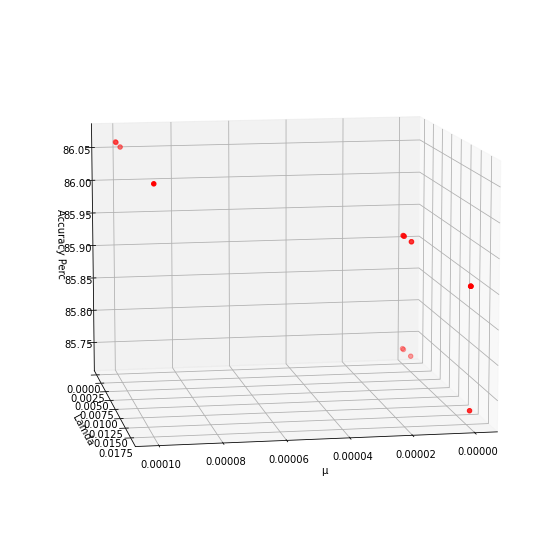

In [171]:
fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')

ax.view_init(elev=10., azim=80.)

ax.scatter(np.array(meanList)[:,1], np.array(meanList)[:,2], np.array(meanList)[:,0], c='r', marker='o')
ax.set_xlabel('µ')
ax.set_ylabel('Lamda')
ax.set_zlabel('Accuracy Perc')
plt.show()

### 4. Finally, for the optimal value of alpha0 and λ, train your model on complete training data and evaluate on Test data.

In [172]:
µBest = max(meanList)[1]
lamdaBest = max(meanList)[2]

In [173]:
print(µBest)

0.0001


In [174]:
print(lamdaBest)

0.01831563888873418


In [175]:
X_train = nds_train.loc[:, nds_train.columns != 'y']
Y_train = nds_train[['y']]

X_train = nds_train[params]
Y_train = nds_train[['y']]

X_test = (nds_train[params]).to_numpy()
bias_column = np.ones(shape=(len(X_test),1))
X_test = np.append(bias_column,X_test,axis=1)
Y_test = (nds_train[['y']]).to_numpy()

X = X_train.to_numpy()
Y = Y_train.to_numpy()
bias_column = np.ones(shape=(len(X_train),1))
X = np.append(bias_column,X,axis=1)

B = np.zeros(len(X[0]))
numberIterations = 100
B_hat=miniBatch(X,Y,50,µBest,lamdaBest,numberIterations)

Y_hat = sig(X_test,B_hat)
y_pred = mapProbablity(Y_hat)
logLoss = logloss(Y_hat, Y_test)

acc = acuuracyValue(y_pred,Y_test)
print('Accuracy:',acc)
print('Log-likelihood:',logLoss)


Accuracy: 89.13464196848217
Log-likelihood: [2204.40501852]


### 5. Plot Train and Validation Accuracy and Log-likelihood metrics per k − fold iteration.

In [177]:

X = nds.loc[:, nds.columns != 'y'].to_numpy()
Y = nds[['y']].to_numpy()
bias_column = np.ones(shape=(len(X),1))
X = np.append(bias_column,X,axis=1)

meanError,accLogList = kFoldCrossValitaion(X,Y,5,µBest,lamdaBest,numberIterations)
iterations =list(range(0,5))

In [178]:
#[train_accuracy,test_accuracy,logLossTrain[0],logLosstest[0]]
accLogList

array([[  85.42991429,   86.61504425, 2264.03756485,  563.37799364],
       [  85.70638651,   85.50884956, 2262.76155206,  564.65400643],
       [  85.78932817,   85.17699115, 2260.50101065,  566.91454783],
       [  85.65109207,   85.7300885 , 2262.13849567,  565.27706281],
       [  87.97345867,   87.27876106, 2212.87838349,  554.53023419]])

In [179]:
iterations

[0, 1, 2, 3, 4]

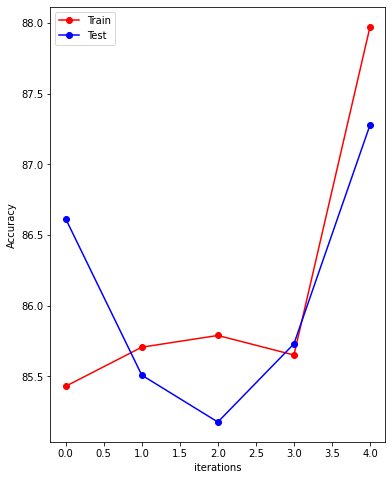

In [180]:
fig = plt.figure(figsize=(6,8))
ax = plt.axes()

ax.plot(iterations,accLogList[:,0],c='r', marker='o',label='Train')
ax.plot(iterations,accLogList[:,1],c='b', marker='o',label = 'Test')
ax.set_xlabel('iterations')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

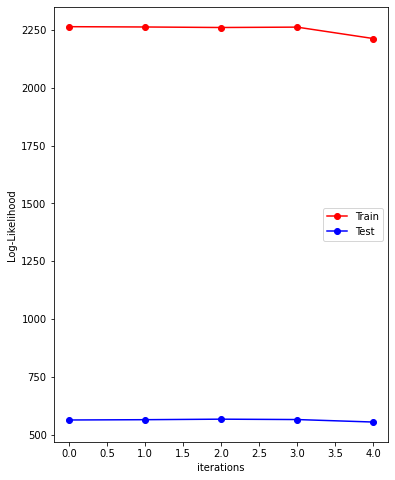

In [181]:
fig = plt.figure(figsize=(6,8))
ax = plt.axes()

ax.plot(iterations,accLogList[:,2],c='r', marker='o',label='Train')
ax.plot(iterations,accLogList[:,3],c='b', marker='o',label = 'Test')
ax.set_xlabel('iterations')
ax.set_ylabel('Log-Likelihood')
ax.legend()
plt.show()

## Exercise 3: Implementing Hyperband for Logistic Regression

In [ ]:
nds_train = nds.loc[0:math.floor(len(nds)*0.7)]
nds_validation = nds.loc[math.floor(len(nds)*0.7)+1:math.floor(len(nds)*0.85)]
nds_test = nds.loc[math.floor(len(nds)*0.85)+1:]
len(nds) == len(nds_train)+ len(nds_test)
nds_test

In [227]:


max_iter = 81  
eta =
logeta = lambda x: np.log(x)/np.log(eta)
s_max = int(logeta(max_iter))  
B = (s_max+1)*max_iter  


for s in reversed(range(s_max+1)):

    n = int(np.ceil(int(B/max_iter/(s+1))*eta**s)) 
    r = max_iter*eta**(-s) 
    
    lamdaList =np.random.uniform(np.exp(-9),np.exp(-4),n) 
    batches = np.random.randint(25,800,n)
    µList = np.random.uniform(10**(-7),10**(-5),n)
    hyperParamConfigs = []
    for i in range (len(batches)):
        hyperParamConfigs.append([µList[i],lamdaList[i],batches[i]])
    print(s,n,r, len(hyperParamConfigs) )
    
    finalList = []
    for i in range(s+1):
        
        n_i = n*eta**(-i)
        r_i = r*eta**(i)
        print(n_i,r_i)
        for i in range(len(hyperParamConfigs)):
            
    
            meanAcc,accLogList = kFoldCrossValitaion(X,Y,5,hyperParamConfigs[i][0],hyperParamConfigs[i][1],r_i,hyperParamConfigs[i][2])
            finalList.append([meanAcc,hyperParamConfigs[i][0],hyperParamConfigs[i][1],hyperParamConfigs[i][2]])
            

print(min(finalList))

    

4 81 1.0 81
81 1.0
27.0 3.0
9.0 9.0
3.0 27.0
1.0 81.0
3 27 3.0 27
27 3.0
9.0 9.0
3.0 27.0
1.0 81.0
2 9 9.0 9
9 9.0
3.0 27.0
1.0 81.0
1 6 27.0 6
6 27.0
2.0 81.0
0 5 81 5
5 81
[87.43362831858407, 3.932222350837884e-06, 0.006565918243638579, 94]


In [229]:
print(max(finalList))

[88.93805309734513, 8.16389535376992e-06, 0.007979239671917002, 580]


In [234]:
µBest = max(finalList)[1]
print(µBest)


8.16389535376992e-06


In [235]:
batchSizeBest = max(finalList)[3]
print(batchSizeBest)

580


In [236]:
lamdaBest = max(finalList)[2]
print(lamdaBest)

0.007979239671917002
